# <center>Análise sobre vendas de jogos pelo mundo durante a história dos videogames

---

### <center>Uma breve análise exploratória sobre a queda e ascensão de algumas empresas de videogames

##### <center>Autor: <a href="https://github.com/Sartorio12" target="_blank">Mateus Burock Sartorio</a></center>

<center><img src="https://i.imgur.com/Vmagj4O.jpg">

### Introdução

Bem, pra começo de conversa, sempre gostei muito de jogar, e com o propósito de praticar, resolvi fazer uma análise de um dataset sobre Jogos, apesar de ser uma análise simples, vou tentar ressaltar todos os pontos interessantes sobre essa base de dados. O conjunto que iremos analisar confere as vendas de jogos do ano de 1980 até o ano de 2020, de diversos consoles lançados.Esse dataset contém uma lista de jogos e videogames com vendas acima de 100,000 unidades. Foi gerado a partir de uma raspagem de dados do site <a href="https://www.vgchartz.com/"><b>vgchartz.com</b></a>. A primeira coisa que precisamos fazer, é importar o arquivo CSV que iremos analisar hoje. Confira abaixo:

### Importando as bibliotecas utilizadas

Começaremos com o básico para a nossa análise, a importação de bibliotecas fundamentais para que nossa pesquisa ocorra, importando o ***pandas*** e ***numpy***, para a análise do dataset, ***matplotlib*** e ***seaborn*** para a constução de gráficos:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lendo o nosso arquivo CSV

Aqui vamos puxar a nossa base de dados da internet, faremos nossas análises em cima dela, utilizando o comando do ***pandas*** podemos fazer isso com facilidade, além de transformar um arquivo CSV em um DataFrame, para melhor visualização

In [19]:
df = pd.read_csv('./vgsales.csv')

# <center>Tudo tem um começo

### Limpando e tratando os dados

A primeira coisa a se fazer quando analisamos um dataset, é realizar a limpeza e formatação dos dados, para que nossa análise ocorra de forma coesa e sem maiores erros, afinal, imagine só você fazer isso pro seu chefe e ter algum dado incorreto ou incompleto, ele certamente não gostaria né ?

Vamos então a primeira etapa, visualizar como veio nosso DataFrame

In [20]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


De cara, podemos notar que os nomes das colunas estão em inglês, vamos traduzir essas colunas para nosso idioma utilizando o comando ***.columns*** do ***pandas***. Podemos utilizar o ***columns*** também para alterar uma coluna específica passando os atributos, mas como queremos alterar todas elas, faremos direto dessa vez.

In [21]:
df.columns = ['Ranking', 'Nome', 'Console', 'Ano','Gênero', 'Editora', 'Vendas América do Norte', 'Vendas EUA','Vendas Japão',
              'Outras vendas', 'Vendas Global']

df['Gênero'] = df['Gênero'].replace({'Action':'Ação','Adventure':'Aventura','Fighting':'Luta','Platform':'Plataforma','Racing':'Corrida',
'Role-Playing':'RPG','Shooter':'Tiro','Simulation':'Simulação','Sports':'Esporte','Strategy':'Estratégia'})

Logo em seguida, faremos uma breve análise sobre os tipos de dados com os quais estamos trabalhando, podemos perceber que estão todos corretos e já prontos para serem tratados.

In [22]:
df.dtypes

Ranking                      int64
Nome                        object
Console                     object
Ano                        float64
Gênero                      object
Editora                     object
Vendas América do Norte    float64
Vendas EUA                 float64
Vendas Japão               float64
Outras vendas              float64
Vendas Global              float64
dtype: object

A função ***describe()*** traz informações importantes sobre nossos dados, que podem ser usados para gerar estatísticas, por exemplo. Verifique que cada linha da tabela mostra um dado diferente. Na primeira nós temos a **count**, que realiza uma contagem dos valores existentes no conjunto de dados; a segunda linha **— std**, ou *standard deviation* — traz o desvio padrão dos valores; em seguida temos os valores **mínimos**, **quartis** e valores **máximos** de cada coluna.

In [23]:
df.describe()

,Ranking,Ano,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Em seguida, uma verificação básica, pra saber qual é o tamanho do nosso DataFrame, o comando *.shape* nos mostra quantas **linhas** e **colunas** temos, respectivamente. Com o comando abaixo, dá pra perceber que temos *16598 linhas* e *11 colunas*.

In [24]:
df.shape

(16598, 11)

Dentro desse DataFrame, nós temos alguns campos que estão sem informação, como podemos ver abaixo, temos *271* registros nulos na tabela Ano e *58* registros nulos na coluna Editora, com viés de facilitar a nossa análise, deixaremos os dados nulos nesses campos, pois eles não influenciarão em nossa pesquisa no momento.

In [25]:
df.isna().sum()

Ranking                      0
Nome                         0
Console                      0
Ano                        271
Gênero                       0
Editora                     58
Vendas América do Norte      0
Vendas EUA                   0
Vendas Japão                 0
Outras vendas                0
Vendas Global                0
dtype: int64

Após esses procedimentos, realizamos a limpeza dos dados e fizemos uma breve análise deles, verificando o que seria possível e o que não seria. A partir de agora, realizaremos uma análise mais aprofundadas, criaremos filtros e gráficos para demonstrar como esses dados se comportam, e vamos também extrair informações importantes dele.

# <center>Análises exploratórias dos dados

### Criando filtros de pesquisa

Quando se visualiza um DataFrame sem criar filtros, vemos todas as informações que ele contém, porém para que se extraia alguma informação mais precisa dele, torna-se necessário a criação de um filtro baseado no que você quer saber. Vamos a alguns exemplos abaixo:

In [26]:
crosstab_vg = pd.crosstab(df['Console'],df['Gênero'])
crosstab_vg['Total'] = crosstab_vg.sum(axis=1)
crosstab_vg.sort_values('Total', ascending=False)

Gênero,Aventura,Ação,Corrida,Esporte,Estratégia,Luta,Misc,Plataforma,Puzzle,RPG,Simulação,Tiro,Total
Console,,,,,,,,,,,,,
DS,240,343,67,148,79,36,393,92,238,200,285,42,2163
PS2,196,348,216,400,71,150,222,103,18,187,90,160,2161
PS3,74,380,92,213,24,76,124,37,3,119,31,156,1329
Wii,84,238,94,261,25,42,280,58,55,35,87,66,1325
X360,47,324,105,220,28,65,126,24,7,76,40,203,1265
PSP,213,222,65,135,60,74,106,36,44,192,29,37,1213
PS,69,157,145,222,70,108,76,64,32,97,60,96,1196
PC,65,165,60,49,188,6,24,11,25,104,115,148,960
XB,26,155,123,170,21,48,46,49,7,23,24,132,824




No exemplo acima, podemos perceber que foi criado um tipo de filtro que exibe os consoles e a quantidade de jogos separados por gênero que foram lançados para a plataforma, isso é útil para que possamos ver qual foi a plataforma com mais jogos lançados, que nesse caso foi o ***NintendoDS***, com ***2163*** títulos lançados até o ano de 2020.

Aqui utilizamos alguns métodos para manipular o DataFrame ao nosso favor, como o método *crosstab,sum* e *sort_values*. 

#### ***"Mas o que é isso ? Nunca vi isso na minha vida"***

- Então, basicamente o método *crosstab* faz com que você possa agrupar duas variáveis diferentes ​​e realizar cálculos de um determinado valor para cada grupo. É claro que essas operações são possíveis usando *groupby()* ou *pivot_table()*, mas como veremos mais adiante, o *crosstab()* apresenta vários benefícios ao seu fluxo de trabalho, como a praticidade e economia de processamento.

- O método ***sum()*** realiza para nós a soma de variáveis dentro do DataFrame, nesse caso, a soma do eixo 1 (***axis=1***), que corresponde as nossas linhas criadas, basicamente ele vai somar a quantia de jogos de cada gênero, e em uma última coluna, retornar o valor total da soma.

- ***sort_values()*** faz com que os valores fiquem ordenados, lembrando que ele sempre precisa ter algum parâmetro dentro, sendo que esse parâmetro na maioria das vezes será a coluna a qual você quer ordenar *(do maior pro menor ou vice-versa)*.



***Agora vamos criar um filtro de pesquisa diferenciado, você certamente tem seu jogo favorito, e se você quisesse saber quantos jogos a sua franquia favorita vendeu ?***

Podemos criar um filtro específico para isso usando o comando ***str.contains()***, que vai retornar pra gente todas as células em uma coluna específica do DataFrame que contém o nome pesquisado.

No exemplo abaixo, fiz com a franquia *"Kingdom Hearts"*, listando todos os jogos lançados de 2000 a 2014, com seus respectivos valores arrecadados em vendas pelo mundo inteiro.

Também criei uma cópia de nosso DataFrame original, para que quaisquiser alterações não implicassem em nossa pesquisa base.

In [27]:
df2 = df.copy() # Aqui eu criei uma cópia do DataFrame original

df2 = df[df['Nome'].str.contains('Kingdom Hearts', na = False)] # Aqui eu criei um filtro de pesquisa baseado em uma string
sorted_df = df2.sort_values(by=['Vendas Global'], ascending=False) # Aqui eu determinei que queria os resultados organizados pelo valor total de vendas
sorted_df

,Ranking,Nome,Console,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
131,132,Kingdom Hearts,PS2,2002.0,RPG,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40
255,256,Kingdom Hearts II,PS2,2005.0,RPG,Square Enix,2.20,0.58,1.38,0.17,4.33
809,811,Kingdom Hearts: Birth by Sleep,PSP,2010.0,RPG,Square Enix,0.63,0.42,0.75,0.26,2.07
829,831,Kingdom Hearts 358/2 Days,DS,2009.0,RPG,Square Enix,1.11,0.27,0.53,0.14,2.04
937,939,Kingdom Hearts: Chain of Memories,GBA,2004.0,RPG,Square Enix,1.26,0.18,0.35,0.06,1.85
1004,1006,Kingdom Hearts,PS3,2013.0,RPG,Square Enix,0.90,0.37,0.25,0.24,1.75
1176,1178,Kingdom Hearts 3D: Dream Drop Distance,3DS,2012.0,Ação,Square Enix,0.88,0.26,0.34,0.09,1.58
1487,1489,Kingdom Hearts II,PS3,2014.0,RPG,Square Enix,0.52,0.43,0.18,0.19,1.32
2115,2117,Kingdom Hearts Re:coded,DS,2010.0,RPG,Square Enix,0.56,0.10,0.27,0.05,0.98
2385,2387,Kingdom Hearts Re: Chain of Memories,PS2,2008.0,RPG,Square Enix,0.73,0.03,0.00,0.12,0.87


### Criando gráficos

#### Gráficos de barra

Sabemos que criando filtros, já temos uma forma de filtrar nossos dados ao que nos interessa, porém, e se a gente melhorasse isso ainda mais? **(sim, dá pra melhorar sempre)** 

Uma excelente forma de conseguir visualizar dados é por meio de *gráficos*, fazemos isso com as bibliotecas *matplotlib* e *seaborn*.

No exemplo abaixo, veremos como se destacam os 10 consoles com mais títulos lançados no período demonstrado no DataFrame original.

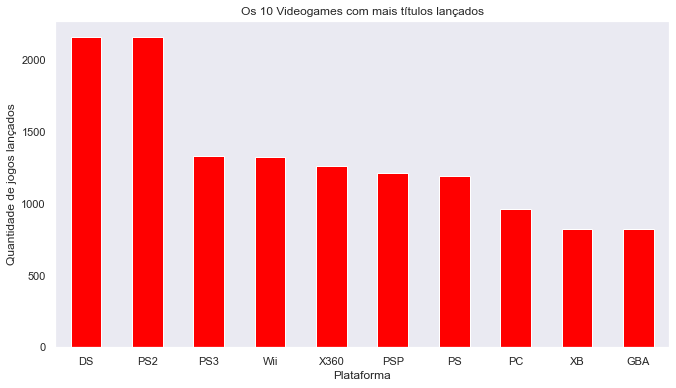

In [28]:
df['Console'].value_counts().head(10).plot(kind='bar',figsize=(11,6),grid=False,rot=0,color='Red')
plt.title('Os 10 Videogames com mais títulos lançados')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de jogos lançados')
plt.show()

Com esse gráfico, podemos perceber que por muito pouco, o Nintendo DS é campeão em títulos lançados, com um total exato de 2163 jogos lançados, seguido pelo PlayStation 2, com o total de 2161 títulos lançados no mesmo período.

A mesma informação também foi exibida acima, porém em forma de DataFrame, aqui nós fizemos uma demonstração em forma de gráfico, isso pode facilitar a visualização.

Agora nós precisamos saber quais foram os jogos mais vendidos do mundo, para isso podemos criar um novo DataFrame baseado no original e criar um gráfico a partir dele, vamos fazer isso abaixo:

In [29]:
top_10_vendas = df[['Nome','Vendas Global']].head(10).set_index('Nome').sort_values('Vendas Global', ascending=True)
top_10_vendas

,Vendas Global
Nome,
Duck Hunt,28.31
New Super Mario Bros. Wii,28.62
Wii Play,29.02
New Super Mario Bros.,30.01
Tetris,30.26
Pokemon Red/Pokemon Blue,31.37
Wii Sports Resort,33.00
Mario Kart Wii,35.82
Super Mario Bros.,40.24


#### Gráfico de barras horizontais

Dá pra notar que criamos um tipo de filtro para o nosso DataFrame, que nos traz os dez títulos com a maior arrecadação de vendas em milhões de dólares, usaremos ele em nosso gráfico. Da mesma forma que antes, utilizando o *".plt"*, exibiremos o gráfico, só que desta vez, com o comando *"barh"*, que exibirá nossas barras em uma visão horizontal ao invés de vertical.

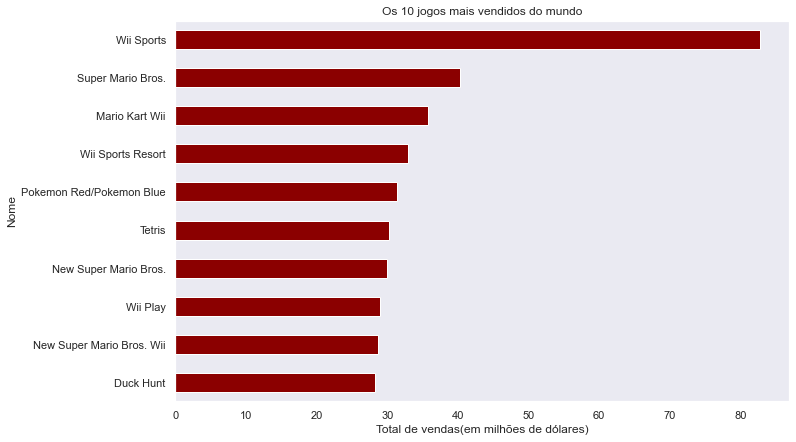

In [30]:
top_10_vendas.plot(kind='barh',figsize=(11,7),grid=False,color='darkred',legend=False)
plt.title('Os 10 jogos mais vendidos do mundo')
plt.xlabel('Total de vendas(em milhões de dólares)')
plt.show()

Como podemos notar, o título mais vendido no período foi o **Wii Sports**, título do **Nintendo Wii** com mais de 82 milhões de dólares arrecadados em vendas, praticamente o dobro do segundo colocado, **Super Mario Bros**, do console **NES** com 40 milhões de dólares arrecadados.

#### Gráfico "heatmap"

Vamos fazer um tipo de gráfico diferente agora, podemos chamar ele de *heatmap*, ou, traduzindo, *mapa de calor*. 

Um *heatmap* nos traz qual é a frequência que algo acontece dentro do nosso DataFrame, demonstrado por cores, veremos como funciona um gráfico do tipo logo abaixo:

In [31]:
top_10_plat = crosstab_vg[crosstab_vg['Total'] > 1000].sort_values('Total', ascending = False)
top_10_final = top_10_plat.append(pd.DataFrame(top_10_plat.sum(), columns=['Total']).T,ignore_index=False)
top_10_final

C:\Users\Sartorio\AppData\Local\Temp\ipykernel_1252\3273336539.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_final = top_10_plat.append(pd.DataFrame(top_10_plat.sum(), columns=['Total']).T,ignore_index=False)


Gênero,Aventura,Ação,Corrida,Esporte,Estratégia,Luta,Misc,Plataforma,Puzzle,RPG,Simulação,Tiro,Total
DS,240,343,67,148,79,36,393,92,238,200,285,42,2163
PS2,196,348,216,400,71,150,222,103,18,187,90,160,2161
PS3,74,380,92,213,24,76,124,37,3,119,31,156,1329
Wii,84,238,94,261,25,42,280,58,55,35,87,66,1325
X360,47,324,105,220,28,65,126,24,7,76,40,203,1265
PSP,213,222,65,135,60,74,106,36,44,192,29,37,1213
PS,69,157,145,222,70,108,76,64,32,97,60,96,1196
Total,923,2012,784,1599,357,551,1327,414,397,906,622,760,10652


A primeira coisa a se fazer quando se trata desse tipo de visualização, também é criar um pequeno DataFrame modificado baseado no DataFrame original, aqui criamos um que nos mostra os consoles e a quantidade de jogos dividido por gênero, e logo abaixo foi criada uma nova linha, que realiza a soma daquela coluna em específico. Além disso, para este gráfico acabei desconsiderando consoles com menos de 1000 títulos, com viés de facilitar a visualização.

Além disso, podemos notar que reutilizamos o *"crosstab_vg"* que fizemos lá em cima, ele foi útil e já nos economizou algumas linhas de código, uma vez que nosso gráfico vai tratar dados bem semelhantes.

Vamos ao gráfico de fato, aqui utilizei a biblioteca *seaborn* para determinar o tamanho da fonte e importar o nosso tipo de gráfico ( *o heatmap, lembra dele ?* ) 

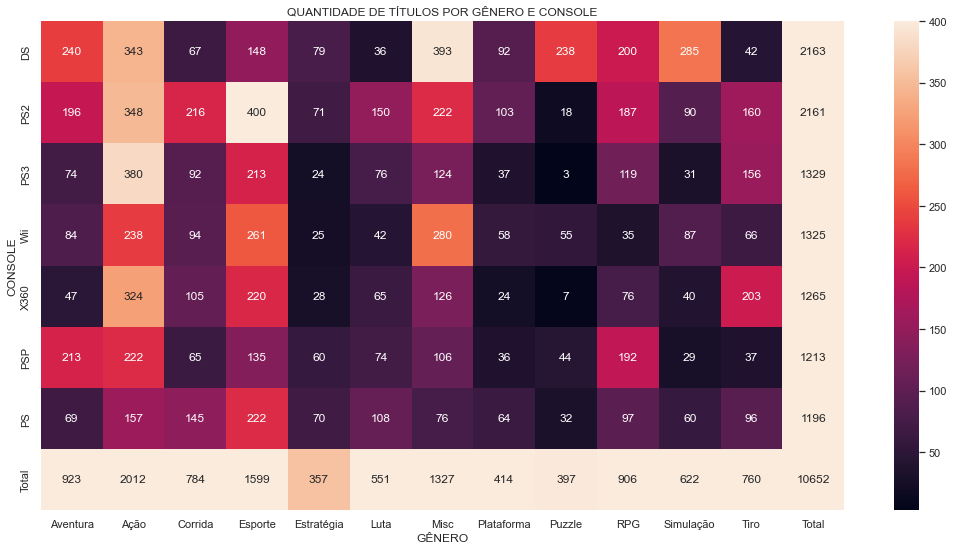

In [32]:
sns.set(font_scale=1)
plt.figure(figsize=(18,9))
sns.heatmap(top_10_final, annot=True, vmax=top_10_final.loc[:'PS',:'Strategy'].values.max(), vmin = top_10_final.loc[:,:'Strategy'].values.min(),fmt='d')
plt.xlabel('GÊNERO')
plt.ylabel('CONSOLE')
plt.title('QUANTIDADE DE TÍTULOS POR GÊNERO E CONSOLE')
plt.show()

A título de estudo, vamos realizar a plotagem de mais dois gráficos, **"Os 10 Jogos mais vendidos nos EUA"**, **"Os 10 Jogos mais vendidos no Japão** e **"Os 10 consoles com mais títulos lançados"**.

Da mesma forma que realizamos antes, vamos criar pequenos **DataFrames** filtrados baseados no original, a fim de facilitar a nossa plotagem.

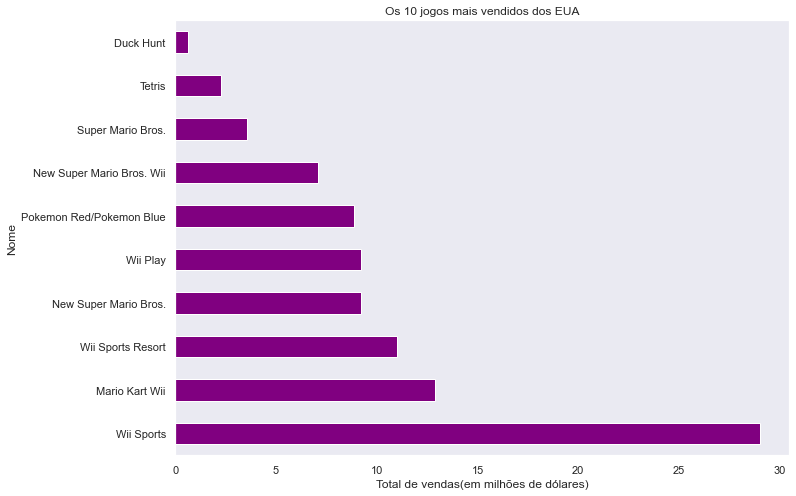

In [ ]:
top_10_vendas = df[['Nome','Vendas EUA']].head(10).set_index('Nome').sort_values('Vendas EUA', ascending=False)
top_10_vendas.plot(kind='barh',figsize=(11,8),grid=False,color='purple',legend=False)

plt.title('Os 10 jogos mais vendidos dos EUA')
plt.xlabel('Total de vendas(em milhões de dólares)')
plt.show()

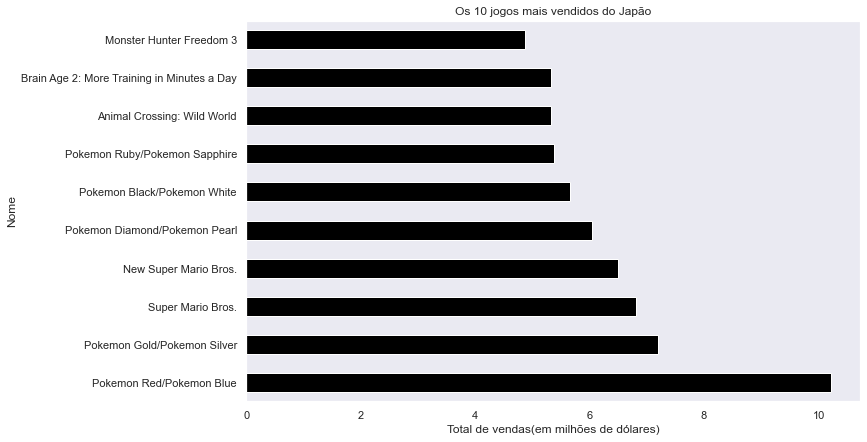

In [ ]:
df4 = df.copy()
# def deletando_japao(df4):
#     del df4['Vendas América do Norte']
#     del df4['Vendas EUA']
#     del df4['Outras vendas']
#     del df4['Vendas Global']
# deletando_japao(df4)
df4 = df4.sort_values(by=['Vendas Japão'], ascending=False).head(10)

top_10_vendas = df4[['Nome','Vendas Japão']].head(10).set_index('Nome').sort_values('Vendas Japão', ascending=False)
top_10_vendas.plot(kind='barh',figsize=(11,7),grid=False,color='black',legend=False)

plt.title('Os 10 jogos mais vendidos do Japão')
plt.xlabel('Total de vendas(em milhões de dólares)')
plt.show()

In [ ]:
# Criando uma tabela somente com consoles e venda total

crosstab_vg2 = crosstab_vg.copy()
crosstab_vg2.drop(crosstab_vg2.iloc[:, 0:12], inplace = True, axis = 1)
crosstab_vg2 = crosstab_vg2.sort_values('Total',ascending=False).head(10)
crosstab_vg2

Gênero,Total
Console,
DS,2163
PS2,2161
PS3,1329
Wii,1325
X360,1265
PSP,1213
PS,1196
PC,960
XB,824


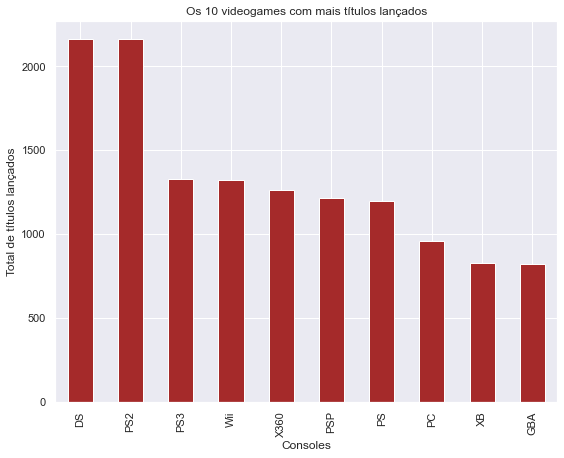

In [ ]:
# Gráfico com os 10 videogames com mais títulos lançados

crosstab_vg2.plot(kind='bar',figsize=(9,7),color='brown', legend=False)

plt.title('Os 10 videogames com mais títulos lançados')
plt.xlabel('Consoles')
plt.ylabel('Total de títulos lançados')
plt.show()

In [ ]:
# Criando o DataFrame somente com os valores de vendas no Japão

df4 = df.copy()

def deletando(df4):
    del df4['Vendas América do Norte']
    del df4['Vendas EUA']
    del df4['Outras vendas']
    del df4['Vendas Global']

deletando(df4)

df4.sort_values(by=['Vendas Japão'], ascending=False).head(10)


,Ranking,Nome,Console,Ano,Gênero,Editora,Vendas Japão
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,RPG,Nintendo,10.22
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,RPG,Nintendo,7.20
1,2,Super Mario Bros.,NES,1985.0,Plataforma,Nintendo,6.81
6,7,New Super Mario Bros.,DS,2006.0,Plataforma,Nintendo,6.50
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,RPG,Nintendo,6.04
26,27,Pokemon Black/Pokemon White,DS,2010.0,RPG,Nintendo,5.65
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,RPG,Nintendo,5.38
41,42,Animal Crossing: Wild World,DS,2005.0,Simulação,Nintendo,5.33
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,5.32
214,215,Monster Hunter Freedom 3,PSP,2010.0,RPG,Capcom,4.87
